<a href="https://colab.research.google.com/github/reza-debug/CNN_Projects/blob/main/Fashion_mnist_pictures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data
#normal
#model
#compile, fit,summary
#metric
#plot

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_images.shape),
print(train_labels.shape),
print(test_images.shape),
print(test_labels.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#label of fashion stuff
T-shirt/top	0
Trouser	1
Pullover	2
Dress	3
Coat	4
Sandal	5
Shirt	6
Sneaker	7
Bag	8
Ankle boot	9

0


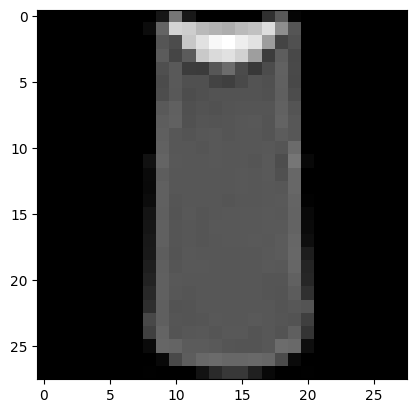

In [14]:
#show some data
idx=2
print(train_labels[idx])
pic = train_images[idx]
plt.imshow(pic)
plt.gray()
plt.show()

In [15]:
train_images[0].shape

(28, 28)

In [16]:
train_images[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [20]:
np.min(train_images), np.max(train_images)

(0, 255)

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [22]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

model defenition


In [23]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 32)                2

In [25]:
model.fit(train_images, train_labels, epochs=10, batch_size=128,validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 10s 10ms/step - loss: 0.5229 - accuracy: 0.8194 - val_loss: 0.5685 - val_accuracy: 0.8652
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2821 - accuracy: 0.8994 - val_loss: 0.2850 - val_accuracy: 0.9004
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2307 - accuracy: 0.9170 - val_loss: 0.2921 - val_accuracy: 0.8953
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1947 - accuracy: 0.9287 - val_loss: 0.2780 - val_accuracy: 0.9023
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1723 - accuracy: 0.9374 - val_loss: 0.2514 - val_accuracy: 0.9142
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1472 - accuracy: 0.9457 - val_loss: 0.3116 - val_accuracy: 0.9041
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1255 - accuracy: 0.9538 - val_loss: 0.2752 - val_accuracy: 0.9112
Epoc

In [39]:
#check model accuracy for test data
test_loss, test_accuracy_all = model.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy:', test_accuracy_all)



Test accuracy: 0.9136999845504761


# Prediction 🧪

Label: 7


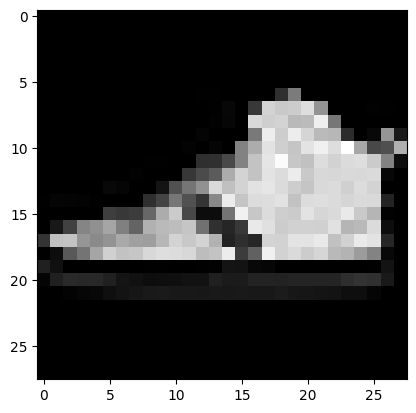

In [45]:
test_index = np.random.randint(0, len(test_images))
# Get the label and image of the selected test sample
label = test_labels[test_index]
image = test_images[test_index]

# Display the label and image
print('Label:', label)
plt.imshow(image)
plt.show()

In [46]:
# Get the prediction of the model for the selected test sample
prediction = model.predict(test_images[test_index].reshape((1, 28, 28, 1)))

# Display the prediction
print('Prediction:', prediction)

1/1 [==============================] - 0s 214ms/step
Prediction: [[8.9144396e-07 4.6810750e-12 2.6377869e-12 1.9575507e-08 1.4053419e-12
  2.0131402e-08 6.6612373e-08 9.9994707e-01 5.7284094e-08 5.1829931e-05]]


In [48]:
# Get the label of the prediction(argmax get index of bigger object in array)
prediction_label = np.argmax(prediction)

print("T-shirt/top 0 Trouser 1 Pullover 2 Dress 3 Coat 4 Sandal 5 Shirt 6 Sneaker 7 Bag 8 Ankle boot 9")

# Display the prediction label
print('Prediction label:', prediction_label)

T-shirt/top 0 Trouser 1 Pullover 2 Dress 3 Coat 4 Sandal 5 Shirt 6 Sneaker 7 Bag 8 Ankle boot 9
Prediction label: 7
